<a href="https://colab.research.google.com/github/Kartik-Chaurasiya/Machine-Learning/blob/master/Clustering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing data
data = pd.read_csv('/gdrive/MyDrive/csv/hyderabad-salaried-employees.csv')
data.head()

,candidateName,companyName,designation,emailAddress,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,tel_Other,Category
0,Ruchismita Dash,Amdocs,Software Developer,ruchidash89@gmail.com,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,8390909230,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,manisha.das82@gmail.com,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,9701900131,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,geethapriya89@gmail.com,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,9705407817,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,sburisetty@gmail.com,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,8142444544,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,madduri12@gmail.com,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,9581812128,HYDERABAD-SALARIED


In [4]:
data.shape

(28847, 11)

In [5]:
data.dtypes

candidateName         object
companyName           object
designation           object
emailAddress          object
experienceMas         object
locationCurrentMas    object
qualificationMas      object
qualificationMas2     object
salary                object
tel_Other              int64
Category              object
dtype: object

In [6]:
#check for null values
data.isnull().sum().sort_values(ascending = False)/len(data)

qualificationMas2     0.464450
qualificationMas      0.169030
designation           0.160502
companyName           0.001421
emailAddress          0.000416
candidateName         0.000139
Category              0.000000
tel_Other             0.000000
salary                0.000000
locationCurrentMas    0.000000
experienceMas         0.000000
dtype: float64

In [7]:
#unique values in each column
data.nunique()

candidateName         27288
companyName           15153
designation           12636
emailAddress          28806
experienceMas           492
locationCurrentMas        3
qualificationMas         51
qualificationMas2        48
salary                 1560
tel_Other             28847
Category                  1
dtype: int64

In [40]:
data.locationCurrentMas.unique()

array(['Hyderabad/ Secunderabad', 'Hyderabad', 'Hyderabad '], dtype=object)

In [29]:
#droping other columns
#candidateName -- no specific effect on clustering
#companyName -- no specific effect on clustering
#designation -- no specific effect on clustering
#emailAddress -- no specific effect on clustering          
#locationCurrentMas -- just as one value ['Hyderabad/ Secunderabad', 'Hyderabad', 'Hyderabad ']    
#tel_Other -- no specific effect on clustering              
#Category -- just as one value    
#experienceMas -- it can be dropped cause without it there are same samples              
data2 = data[['qualificationMas2', 'qualificationMas', 'experienceMas']]

In [30]:
#getting the salary value from salary column
import re
def get_sal(row):
  for x in re.findall("\d+\.\d+", row):
    return float(x)

In [31]:
data2['salary'] = data1['salary'].apply(get_sal)
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,qualificationMas2,qualificationMas,experienceMas,salary
0,NaN,BE/ B.Tech (Engineering),2 Year(s) 1 Month(s),6.71
1,B.Pharm. (Pharmacy),MBA/ PGDM,5 Year(s) 9 Month(s),5.00
2,NaN,B.Com. (Commerce),4 Year(s) 4 Month(s),84.00
3,MBA/ PGDM,NaN,7 Year(s) 11 Month(s),7.00
4,MCA/ PGDCA,B.Com. (Commerce),6 Year(s) 8 Month(s),8.05


In [32]:
#getting dummy values for columns ['qualificationMas2', 'qualificationMas', 'experienceMas']
data3 = pd.get_dummies(data2)

In [33]:
data3.head()

,salary,qualificationMas2_12th & Not Pursuing Graduation,qualificationMas2_B.Arch. (Architecture),qualificationMas2_B.Com. (Commerce),qualificationMas2_B.Ed. (Education),qualificationMas2_B.Pharm. (Pharmacy),qualificationMas2_B.Sc. (Science),qualificationMas2_B.V.Sc. (Veterinary Science),qualificationMas2_BA (Arts),qualificationMas2_BBA/ BBM/ BBS,qualificationMas2_BCA (Computer Application),qualificationMas2_BDS (Dental Surgery),qualificationMas2_BE/ B.Tech (Engineering),qualificationMas2_BHM (Hotel Management),qualificationMas2_BL/LLB,qualificationMas2_CA (Chartered Accountant),qualificationMas2_CFA (Chartered Financial Analyst),qualificationMas2_CS (Company Secretary),qualificationMas2_Diploma-Engineering,qualificationMas2_Diploma-Other Diploma,qualificationMas2_ICWA,qualificationMas2_Integrated PG Course,qualificationMas2_M.Arch. (Architecture),qualificationMas2_M.Com. (Commerce),qualificationMas2_M.Ed. (Education),qualificationMas2_M.Lib.Sc. (Library Sciences),qualificationMas2_M.Pharm. (Pharmacy),qualificationMas2_M.Phil. (Philosophy),qualificationMas2_M.Plan. (Planning),qualificationMas2_M.Sc. (Science),qualificationMas2_M.V.Sc. (Veterinary Science),qualificationMas2_MA (Arts),qualificationMas2_MBA/ PGDM,qualificationMas2_MBBS,qualificationMas2_MCA/ PGDCA,qualificationMas2_MD/ MS (Medicine),qualificationMas2_ME/ M.Tech./ MS (Engg/ Sciences),qualificationMas2_MFA (Fine Arts),qualificationMas2_ML/ LLM (Law),qualificationMas2_MPT (Physiotherapy),...,experienceMas_7 Year(s) 8 Month(s),experienceMas_7 Year(s) 9 Month(s),experienceMas_75 Year(s),experienceMas_8 Month(s),experienceMas_8 Year(s),experienceMas_8 Year(s) 1 Month(s),experienceMas_8 Year(s) 10 Month(s),experienceMas_8 Year(s) 11 Month(s),experienceMas_8 Year(s) 2 Month(s),experienceMas_8 Year(s) 3 Month(s),experienceMas_8 Year(s) 4 Month(s),experienceMas_8 Year(s) 5 Month(s),experienceMas_8 Year(s) 6 Month(s),experienceMas_8 Year(s) 7 Month(s),experienceMas_8 Year(s) 8 Month(s),experienceMas_8 Year(s) 9 Month(s),experienceMas_80 Year(s),experienceMas_80 Year(s) 10 Month(s),experienceMas_80 Year(s) 3 Month(s),experienceMas_80 Year(s) 4 Month(s),experienceMas_80 Year(s) 5 Month(s),experienceMas_81 Year(s),experienceMas_81 Year(s) 9 Month(s),experienceMas_85 Year(s) 8 Month(s),experienceMas_9 Month(s),experienceMas_9 Year(s),experienceMas_9 Year(s) 1 Month(s),experienceMas_9 Year(s) 10 Month(s),experienceMas_9 Year(s) 11 Month(s),experienceMas_9 Year(s) 2 Month(s),experienceMas_9 Year(s) 3 Month(s),experienceMas_9 Year(s) 4 Month(s),experienceMas_9 Year(s) 5 Month(s),experienceMas_9 Year(s) 6 Month(s),experienceMas_9 Year(s) 7 Month(s),experienceMas_9 Year(s) 8 Month(s),experienceMas_9 Year(s) 9 Month(s),experienceMas_90 Year(s),experienceMas_90 Year(s) 10 Month(s),experienceMas_Fresher
0,6.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,84.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
data3.shape

(28847, 592)

In [15]:
from sklearn.cluster import KMeans

In [35]:
#Kmeans
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data3) 
    wcss.append(kmeans.inertia_)

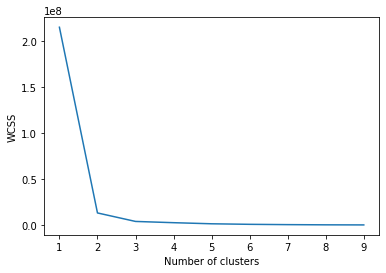

In [36]:
#elbow method shows that there could be 3 clusters
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show();

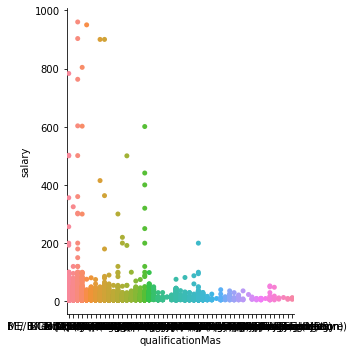

In [37]:
#qualificationMas vs salary
sns.catplot(x="qualificationMas", y="salary", jitter=False, data=data2)

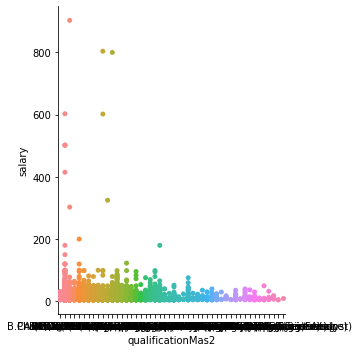

In [38]:
#qualificationMas2 vs salary
sns.catplot(x="qualificationMas2", y="salary", jitter=False, data=data2)

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town')

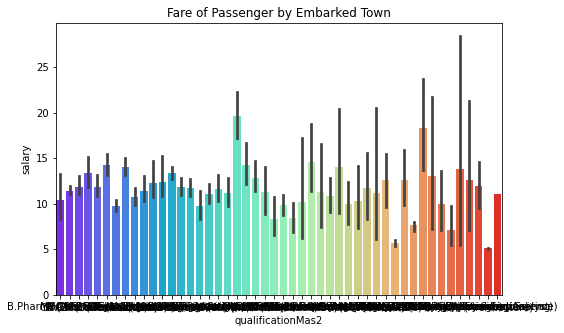

In [39]:
#boxplot
plt.figure(figsize=(8,5))
sns.barplot(x="qualificationMas2", y="salary",data=data2, palette='rainbow')
plt.title("Fare of Passenger by Embarked Town")